In [2]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [3]:
from tensorflow.keras.datasets import imdb
(train_input,train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2,random_state=42)

In [5]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [6]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


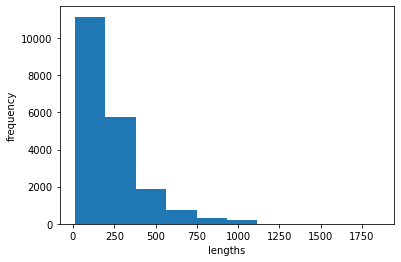

In [7]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("lengths")
plt.ylabel("frequency")
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [9]:
val_seq = pad_sequences(val_input, maxlen=100)

In [10]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss="binary_crossentropy",metrics=['accuracy'])

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

cp = keras.callbacks.ModelCheckpoint('best-rnn-model.h5',save_best_only = True)
es = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[cp, es])

Epoch 1/100
313/313 [==============================] - 28s 84ms/step - loss: 0.6989 - accuracy: 0.5041 - val_loss: 0.6978 - val_accuracy: 0.5038
Epoch 2/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6946 - accuracy: 0.5102 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 25s 78ms/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6916 - val_accuracy: 0.5230
Epoch 5/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6883 - accuracy: 0.5408 - val_loss: 0.6905 - val_accuracy: 0.5270
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6866 - accuracy: 0.5472 - val_loss: 0.6894 - val_accuracy: 0.5356
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6845 - accuracy: 0.5563 - val_loss: 0.6880 - val_ac